<a href="https://colab.research.google.com/github/ChengxuanOuyang/PHAS0056-Machine-Learning/blob/main/Week3_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
# We keep the data as float for calculations, but we don't divide by 255 yet
# because the task requires adding noise before scaling.
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print("Data loaded. Shape:", train_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Data loaded. Shape: (60000, 28, 28)


In [2]:
# Task 1: Define the function to add noise
def addNoiseToMNIST(yNoise, data):
    # Generate random noise from uniform distribution [0, yNoise]
    # The noise must have the same shape as the input data
    noise = np.random.uniform(0, yNoise, data.shape)

    # Add noise to the original data
    noisy_data = data + noise

    # Ensure no pixel value exceeds 255 using np.clip
    # We keep the lower bound at 0 and upper at 255
    noisy_data = np.clip(noisy_data, 0, 255)

    return noisy_data

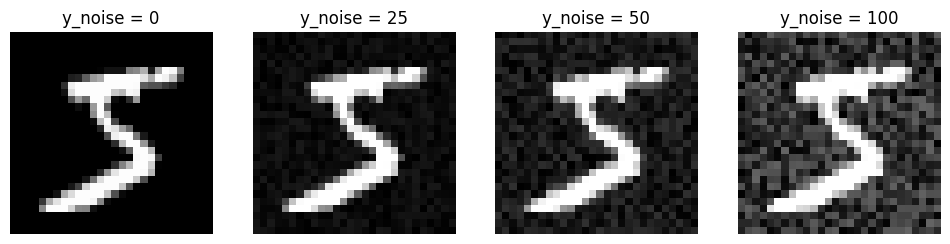

In [3]:
# Task 2: Plot an image with yNoise = [0, 25, 50, 100]

noise_values = [0, 25, 50, 100]
plt.figure(figsize=(12, 4))

# We pick the first image from the training set to demonstrate
sample_image = train_images[0]

for i, y_n in enumerate(noise_values):
    # Add noise
    noisy_sample = addNoiseToMNIST(y_n, sample_image)

    # Plotting
    plt.subplot(1, 4, i + 1)
    plt.imshow(noisy_sample, cmap='gray')
    plt.title(f"y_noise = {y_n}")
    plt.axis('off')

plt.show()

In [4]:
# Task 3: Train a network on clean data (no noise)

# First, normalize the clean data for training (0-1 range)
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

# Define a simple feed-forward neural network
# Input -> Flatten -> Dense(512) -> Output(10)
model_clean = models.Sequential()
model_clean.add(layers.Flatten(input_shape=(28, 28)))
model_clean.add(layers.Dense(512, activation='relu'))
model_clean.add(layers.Dense(10, activation='softmax'))

# Compile the model
model_clean.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("Training baseline model...")
# Train for 5 epochs to reach >95% accuracy
model_clean.fit(train_images_norm, train_labels, epochs=5, batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training baseline model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8875 - loss: 0.3890
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9725 - loss: 0.0941
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9831 - loss: 0.0556
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9883 - loss: 0.0390
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9919 - loss: 0.0273


Testing baseline model on noisy data...
Noise: 0, Accuracy: 0.9767
Noise: 25, Accuracy: 0.9629
Noise: 50, Accuracy: 0.8350
Noise: 75, Accuracy: 0.7231
Noise: 100, Accuracy: 0.6136
Noise: 125, Accuracy: 0.5433
Noise: 150, Accuracy: 0.4771


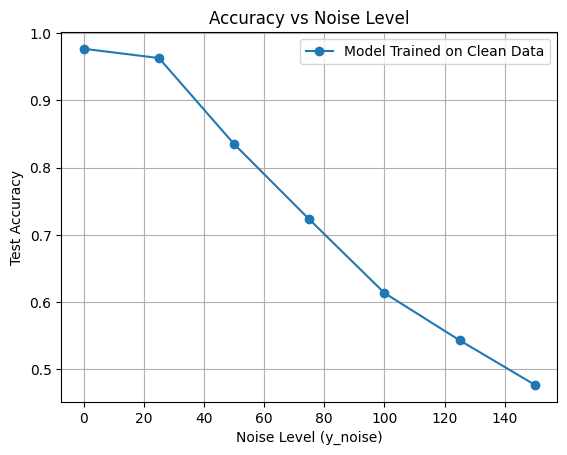

In [8]:
# Task 4: Plot test accuracy vs y_noise for the baseline network

# Define range of noise levels to test
noise_levels = [0, 25, 50, 75, 100, 125, 150]
accuracies_clean = []

print("Testing baseline model on noisy data...")

for y_n in noise_levels:
    # 1. Add noise to raw test images
    noisy_test = addNoiseToMNIST(y_n, test_images)

    # 2. Scale to 0-1 (Neural networks expect normalized inputs)
    noisy_test_norm = noisy_test / 255.0

    # 3. Evaluate accuracy without retraining
    loss, acc = model_clean.evaluate(noisy_test_norm, test_labels, verbose=0)
    accuracies_clean.append(acc)
    print(f"Noise: {y_n}, Accuracy: {acc:.4f}")

# Plot the results
plt.plot(noise_levels, accuracies_clean, 'o-', label='Model Trained on Clean Data')
plt.xlabel('Noise Level (y_noise)')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Noise Level')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Task 5: Retrain network using noisy training data

# We choose a noise level of 50 for training
train_noise_level = 50

# Create noisy training data
print(f"Generating training data with noise level {train_noise_level}...")
train_images_noisy = addNoiseToMNIST(train_noise_level, train_images)
train_images_noisy_norm = train_images_noisy / 255.0

# Define a NEW model (starting from random weights)
# We use the same architecture as before
model_robust = models.Sequential()
model_robust.add(layers.Flatten(input_shape=(28, 28)))
model_robust.add(layers.Dense(512, activation='relu'))
model_robust.add(layers.Dense(10, activation='softmax'))

model_robust.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the new model
print("Training robust model...")
model_robust.fit(train_images_noisy_norm, train_labels, epochs=5, batch_size=64)

Generating training data with noise level 50...
Training robust model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8648 - loss: 0.4615
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9611 - loss: 0.1320
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9742 - loss: 0.0881
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9831 - loss: 0.0583
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9857 - loss: 0.0452


Testing robust model on noisy data...
Noise: 0, Accuracy: 0.9694
Noise: 25, Accuracy: 0.9742
Noise: 50, Accuracy: 0.9734
Noise: 75, Accuracy: 0.9665
Noise: 100, Accuracy: 0.9477
Noise: 125, Accuracy: 0.9095
Noise: 150, Accuracy: 0.8396


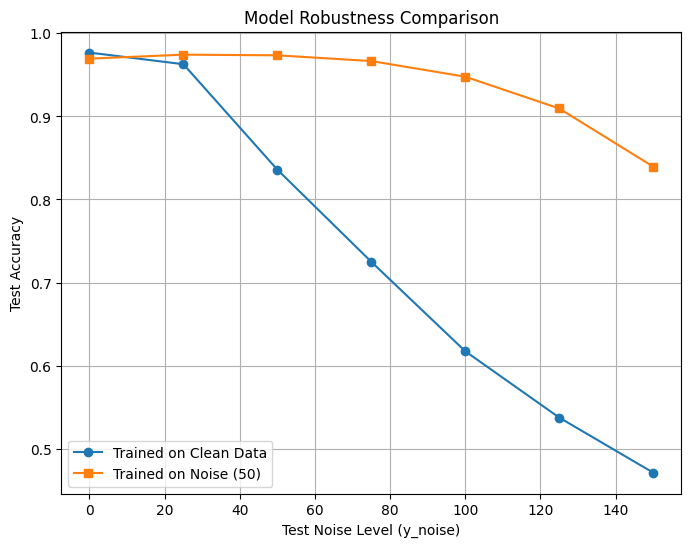

In [7]:
# Redo Task 4 with the new robust model
accuracies_robust = []

print("Testing robust model on noisy data...")

for y_n in noise_levels:
    # Add noise and normalize
    noisy_test = addNoiseToMNIST(y_n, test_images)
    noisy_test_norm = noisy_test / 255.0

    # Evaluate
    loss, acc = model_robust.evaluate(noisy_test_norm, test_labels, verbose=0)
    accuracies_robust.append(acc)
    print(f"Noise: {y_n}, Accuracy: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(8, 6))
plt.plot(noise_levels, accuracies_clean, 'o-', label='Trained on Clean Data')
plt.plot(noise_levels, accuracies_robust, 's-', label=f'Trained on Noise ({train_noise_level})')
plt.xlabel('Test Noise Level (y_noise)')
plt.ylabel('Test Accuracy')
plt.title('Model Robustness Comparison')
plt.legend()
plt.grid(True)
plt.show()

Discussion on Performance and Noise Levels:

From the plot above, we can observe the following:

· Clean Model: The model trained on clean data performs best when there is 0 noise (around 98% accuracy). However, its performance drops rapidly as the noise level increases. It is not robust to variations in the input.

·Noisy Model: The model trained with y_noise=50 has a slightly lower accuracy on the perfectly clean data compared to the clean model. However, it maintains high accuracy across a much wider range of noise levels. It is significantly more robust.

Conclusion: The "best" level of noise to add depends on how we define performance.

· If we define performance as maximum accuracy on clean images, then 0 noise is best.

· If we define performance as robustness and generalization to imperfect data (which is more realistic), then adding noise (e.g., around 25-50) is better. This acts as a form of regularization, preventing the network from overfitting to exact pixel values and forcing it to learn the general shape of the digits.